# 모델별 평가 방법 요약

https://scikit-learn.org/stable/modules/model_evaluation.html

## 분류
- 로지스틱 분류 / 의사결정나무 / 앙상블 / 인공신경망 / KNN / SVM SVC...   

__관련 클래스__
- metrics.accuracy_score
- metrics.f1_score
- metrics.precision_score
- metrics.recall_score
- metrics.roc_auc_score(multi_class=, weight=)
- metrics.classification_report
- metircs.confusion_matrix  

__이진 분류__  
- titanic.survived [0,1]  

__멀티 클래스 분류__  
- iris.target [0,1,2]



>from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
>

## 회귀
- 선형 회귀 / 릿지라쏘 / 의사결정나무 회귀 / 앙상블 회귀 / ...
- metrics.mean_squared_error
    - RMSE
- metrics.r2_score

## 비계층적 군집
- 비지도 학습 -> 평가를 할 수가 없음
- 더 나은 모델을 찾기 위한 (매개변수를 찾기 위한) score
- k-means / DBSCAN / ...
- 군집 간 응집도 / 군집 내 응집도 -> 높을수록 좋다!
>metrics.calinski_harabasz_score(X, labels)  
Compute the Calinski and Harabasz score.  
The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.  
모든 클러스터에 대한 클러스터 간 분산과 / 클러스터 내 분산의 합의 비율 (높을수록 높음)
>
>metrics.silhouette_score(X, labels, *[, ...])  
Compute the mean Silhouette Coefficient of all samples.  
개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화 돼있고, 다른 군집에 있는 데이터와는 어얼마나 멀리 분리돼 있는지를 나타내는 지표이다 . (0~1, 1이 제일 좋음)
https://studying-haeung.tistory.com/10
>
>엘보우기법  
클러스터 내 오차제곱합(SSE)을 클러스터 개수마다 비교  
클러스터 개수를 늘려나가면서 계산한 SSE를 비교  
어느 순간 줄어드는 비율이 급격하게 작아지는 부분과 기울기가 소실되는 구간이 생김 (=팔꿈치, eblow)  
>



ROC 커브 그릴때는 확률값임 (prob) __단, 의사결정 나무 등 제외__
>In the binary case, it corresponds to an array of shape (n_samples,). **Both probability estimates and non-thresholded decision values can be provided.** The probability estimates correspond to the probability of the class with the greater label, i.e. estimator.classes_[1] and thus estimator.predict_proba(X, y)[:, 1]. The decision values corresponds to the output of estimator.decision_function(X, y). See more information in the User guide;

>In the multiclass case, it corresponds to an array of shape (n_samples, n_classes) of **probability estimates provided by the predict_proba method.** The probability estimates must sum to 1 across the possible classes. In addition, the order of the class scores must correspond to the order of labels, if provided, or else to the numerical or lexicographical order of the labels in y_true. See more information in the User guide;

>In the multilabel case, it corresponds to an array of shape (n_samples, n_classes). **Probability estimates are provided by the predict_proba method and the non-thresholded decision values by the decision_function method.** The probability estimates correspond to the probability of the class with the greater label for each output of the classifier. See more information in the User guide.

"non-thresholded decision values" 0 또는 1 값 아님  
>You might be confused by the term "non-thresholded decision-values" but this does not describe predicted labels (rather decision functions like the ones you can find on support vector classification  
>https://stackoverflow.com/questions/65275314/confusion-on-sklearns-roc-auc-score-method
>



## 교차검증
### 모델 선택을 위한 score 산출 w/ 교차 검증
    - cv5_scores = cross_val_score(model, X, y, cv = 5)
    - cv5_scores_kfold = cross_val_score(model, X, y, cv = kfold)
    - cv5_scores_skfold = cross_val_score(model, X, y, cv = skfold)  

### 매개변수 도출을 위한 그리드 서치 w/ 교차 검증
    - model_grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)


# 평가 방법 실습

## 분류

### 분류_로지스틱 이진 분류
- titanic 데이터 survived

In [186]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('./titanic.csv')
titanic.dropna(inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   embarked     712 non-null    object 
 8   class        712 non-null    object 
 9   adult_male   712 non-null    bool   
 10  embark_town  712 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 61.9+ KB


In [187]:
X= titanic.drop(columns=['survived','pclass','embarked'],axis=1)
y= titanic.survived

In [188]:
y.value_counts()

0    424
1    288
Name: survived, dtype: int64

In [189]:
X = pd.get_dummies(columns=['sex','class','adult_male','embark_town'], data=X, drop_first=True)

In [192]:
X

,age,sibsp,parch,fare,sex_male,class_Second,class_Third,adult_male_True,embark_town_Queenstown,embark_town_Southampton
0,22.0,1,0,7.2500,1,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,0,0,1,0,1,0
886,27.0,0,0,13.0000,1,1,0,1,0,1
887,19.0,0,0,30.0000,0,0,0,0,0,1
889,26.0,0,0,30.0000,1,0,0,1,0,0


In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7,
                                                   test_size = 0.3, random_state=123)

In [200]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train, y_train)

/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [201]:
y_pred = result.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [202]:
result.summary()

AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [179]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

cm = confusion_matrix(y_test,y_pred)
print(cm)
print("TN, FP")
print("FN, TP \n")

print("Acuuracy : ", accuracy_score(y_test, y_pred))
print("옳게 예측한 확률, TP+TN / TOTAL \n")

print("Sensitivity(recall) : ", recall_score(y_test, y_pred))
print("True Positive Rate \n")

print("precision_score : ", precision_score(y_test, y_pred))
print("정밀도, TP / TP + FP\n")

print("f1_score : ", f1_score(y_test, y_pred))
print("2 * recall * precision / (recall + precision)")
print("불균형 데이터라서...f1을 쓰는게 바람직함. survived==0의 갯수가 1에 비해 많음.")

class_report = classification_report(y_test, y_pred)
print(class_report)

[[112  15]
 [ 22  65]]
TN, FP
FN, TP 

Acuuracy :  0.8271028037383178
옳게 예측한 확률, TP+TN / TOTAL 

Sensitivity(recall) :  0.7471264367816092
True Positive Rate 

precision_score :  0.8125
정밀도, TP / TP + FP

f1_score :  0.778443113772455
2 * recall * precision / (recall + precision)
불균형 데이터라서...f1을 쓰는게 바람직함. survived==0의 갯수가 1에 비해 많음.
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       127
           1       0.81      0.75      0.78        87

    accuracy                           0.83       214
   macro avg       0.82      0.81      0.82       214
weighted avg       0.83      0.83      0.83       214



In [196]:
#####tofhdnsrj
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

cm = confusion_matrix(y_test,y_pred)
print(cm)
print("TN, FP")
print("FN, TP \n")

print("Acuuracy : ", accuracy_score(y_test, y_pred))
print("옳게 예측한 확률, TP+TN / TOTAL \n")

print("Sensitivity(recall) : ", recall_score(y_test, y_pred))
print("True Positive Rate \n")

print("precision_score : ", precision_score(y_test, y_pred))
print("정밀도, TP / TP + FP\n")

print("f1_score : ", f1_score(y_test, y_pred))
print("2 * recall * precision / (recall + precision)")
print("불균형 데이터라서...f1을 쓰는게 바람직함. survived==0의 갯수가 1에 비해 많음.")

class_report = classification_report(y_test, y_pred)
print(class_report)

[[114  13]
 [ 22  65]]
TN, FP
FN, TP 

Acuuracy :  0.8364485981308412
옳게 예측한 확률, TP+TN / TOTAL 

Sensitivity(recall) :  0.7471264367816092
True Positive Rate 

precision_score :  0.8333333333333334
정밀도, TP / TP + FP

f1_score :  0.787878787878788
2 * recall * precision / (recall + precision)
불균형 데이터라서...f1을 쓰는게 바람직함. survived==0의 갯수가 1에 비해 많음.
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       127
           1       0.83      0.75      0.79        87

    accuracy                           0.84       214
   macro avg       0.84      0.82      0.83       214
weighted avg       0.84      0.84      0.83       214



In [180]:
print('TP+TN/TOTAL',(65+112)/(112+15+22+65))
print('TP/(TP+FP)', 65/(65+15))

TP+TN/TOTAL 0.8271028037383178
TP/(TP+FP) 0.8125


    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.


__일반적으로 이진 분류에서 각종 score는 y==1 일 때를 기준으로 계산__

In [181]:
result.predict_proba(X_test)

array([[0.76699497, 0.23300503],
       [0.77213527, 0.22786473],
       [0.88815987, 0.11184013],
       [0.51583161, 0.48416839],
       [0.9024172 , 0.0975828 ],
       [0.74728314, 0.25271686],
       [0.54354885, 0.45645115],
       [0.88549427, 0.11450573],
       [0.33207919, 0.66792081],
       [0.26639825, 0.73360175],
       [0.77639335, 0.22360665],
       [0.11229196, 0.88770804],
       [0.89058727, 0.10941273],
       [0.11069948, 0.88930052],
       [0.50763813, 0.49236187],
       [0.20307625, 0.79692375],
       [0.89828294, 0.10171706],
       [0.87644356, 0.12355644],
       [0.14024785, 0.85975215],
       [0.94370823, 0.05629177],
       [0.51060064, 0.48939936],
       [0.19578929, 0.80421071],
       [0.23343808, 0.76656192],
       [0.79024112, 0.20975888],
       [0.43836456, 0.56163544],
       [0.92622605, 0.07377395],
       [0.93524373, 0.06475627],
       [0.929492  , 0.070508  ],
       [0.64541172, 0.35458828],
       [0.83447498, 0.16552502],
       [0.

In [182]:
result.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

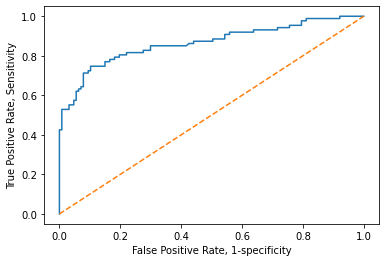

roc_auc_score :  0.8651009141098742


In [198]:
from sklearn.metrics import roc_curve, auc, roc_auc_score,plot_roc_curve
import matplotlib.pyplot as plt

#확률값
y_pred_proba = result.predict_proba(X_test)[:,1]

fpr, tpr, thr = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate, 1-specificity")
plt.ylabel("True Positive Rate, Sensitivity")
plt.show()

print("roc_auc_score : ", roc_auc_score(y_test, result.predict_proba(X_test)[:,1]))

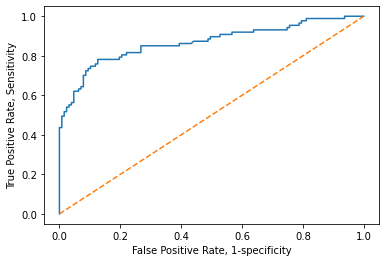

roc_auc_score :  0.867816091954023


In [183]:
from sklearn.metrics import roc_curve, auc, roc_auc_score,plot_roc_curve
import matplotlib.pyplot as plt

#확률값
y_pred_proba = result.predict_proba(X_test)[:,1]

fpr, tpr, thr = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate, 1-specificity")
plt.ylabel("True Positive Rate, Sensitivity")
plt.show()

print("roc_auc_score : ", roc_auc_score(y_test, result.predict_proba(X_test)[:,1]))

/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


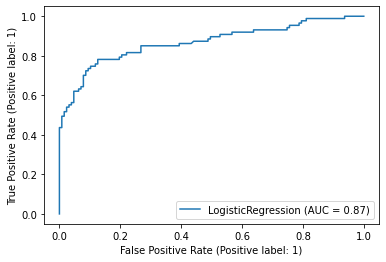

In [184]:
plot_roc_curve(result, X_test,y_test)

### 분류_의사결정나무 이진

In [95]:
from sklearn.tree import DecisionTreeClassifier
# 의사결정나무 모델링
dt_clf = DecisionTreeClassifier()
## 모델 학습 
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

cm = confusion_matrix(y_test,y_pred)
print(cm)
print("TN, FP")
print("FN, TP \n")

print("Acuuracy : ", accuracy_score(y_test, y_pred))
print("옳게 예측한 확률, TP+TN / TOTAL \n")

print("Sensitivity(recall) : ", recall_score(y_test, y_pred))
print("True Positive Rate \n")

print("precision_score : ", precision_score(y_test, y_pred))
print("정밀도, TP / TP + FP\n")

print("f1_score : ", f1_score(y_test, y_pred))
print("2 * recall * precision / (recall + precision)")
print("불균형 데이터라서...f1을 쓰는게 바람직함. survived==0의 갯수가 1에 비해 많음.")

class_report = classification_report(y_test, y_pred)
print(class_report)

[[102  25]
 [ 28  59]]
TN, FP
FN, TP 

Acuuracy :  0.7523364485981309
옳게 예측한 확률, TP+TN / TOTAL 

Sensitivity(recall) :  0.6781609195402298
True Positive Rate 

precision_score :  0.7023809523809523
정밀도, TP / TP + FP

f1_score :  0.6900584795321637
2 * recall * precision / (recall + precision)
불균형 데이터라서...f1을 쓰는게 바람직함. survived==0의 갯수가 1에 비해 많음.
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       127
           1       0.70      0.68      0.69        87

    accuracy                           0.75       214
   macro avg       0.74      0.74      0.74       214
weighted avg       0.75      0.75      0.75       214



In [101]:
dt_clf.predict_proba(X_test)

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. ,

/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


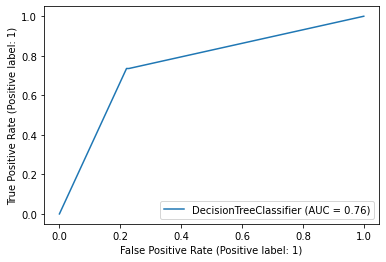

In [102]:
plot_roc_curve(dt_clf, X_test,y_test)

In [103]:
print("roc_auc_score : ", roc_auc_score(y_test, dt_clf.predict_proba(X_test)[:,1]))

roc_auc_score :  0.7565390533079916


### 분류_로지스틱 멀티클래스 분류
- iris 데이터 target

In [119]:
import pandas as pd
import numpy as np

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data 
y = iris.target

In [120]:
X = pd.DataFrame(X, columns = ['a','b','c','d'])
y = pd.DataFrame(y, columns = ['target'])

In [121]:
y.value_counts()

target
0         50
1         50
2         50
dtype: int64

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7,
                                                   test_size = 0.3, random_state=123)

In [123]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train, y_train)
print(model)

LogisticRegression()


/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [124]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
# 테스트셋 예측
y_pred = result.predict(X_test)
y_pred

array([1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0,
       0, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2,
       1])

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

cm = confusion_matrix(y_test,y_pred)
print(cm)
#print("TN, FP")
#print("FN, TP \n")

print("Acuuracy : ", accuracy_score(y_test, y_pred))
print("옳게 예측한 확률, TP+TN / TOTAL \n")

#print("Sensitivity(recall) : ", recall_score(y_test, y_pred))
#print("True Positive Rate \n")

#print("precision_score : ", precision_score(y_test, y_pred))
#print("정밀도, TP / TP + FP\n")

#print("f1_score : ", f1_score(y_test, y_pred))
#print("2 * recall * precision / (recall + precision)")
#print("불균형 데이터라서...f1을 쓰는게 바람직함. survived==0의 갯수가 1에 비해 훨씬 많음 = TN, FP 갯수가 높음")

class_report = classification_report(y_test, y_pred)
print(class_report)

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
Acuuracy :  0.9777777777777777
옳게 예측한 확률, TP+TN / TOTAL 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [126]:
roc_auc_score(y_test, result.predict_proba(X_test), multi_class='ovr')

0.9985185185185186

#### 교차검증을 통한 스코어 산출 

교차 검증  
https://m.blog.naver.com/ckdgus1433/221599517834

교차 검증을 왜 사용하는가?
- Train / Test 으로 나누게 되면 Test 는 모델링에 반영되지 않음
- 제공된 모든 데이터를 Train으로 사용하고자 함
- Train / Test 으로 한번만 나누지 말고, 동적으로 여러가지 케이스로 나누고, 학습, 검증
- 나눠진 Test 케이스가 모든 데이터를 포함할 때까지 반복
- 계산량이 많아짐

1. 데이터셋
![python image2](https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjVfMTg4/MDAxNTY0MDU5OTMyMzMy.xptymihN3pg06c5NgVEw6UHWzxeukdnQjSKHNaE3uosg.PQNoW2yYZuVMeRmzY8Daxp8msWCgrdLlsa1pmiqMxvEg.PNG.ckdgus1433/image.png?type=w800)

1. 홀드아웃
![python image2](https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjVfMjUw/MDAxNTY0MDY0MjA3NTk1.iOrZkLYld_wuQ51TjJPpdiQcISFG3KeukqD1OuEfSP0g.e4tmacb2eMG19lDbGlIJ91dmukNe1R_3zZLsMfDXuN8g.PNG.ckdgus1433/image.png?type=w800)

1. k-fold
![python image2](https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjVfMTYz/MDAxNTY0MDY1ODk4NTM0.HiTh5fw3_Fulbq6dv1iLrxS7EmEM4htsWC-5fh-TiGAg.5rbp2nHtWYOZvzoN-Kl4mCKF4nZ4rd5bmO_IDh-sieAg.PNG.ckdgus1433/image.png?type=w800)

1. 리브-p-아웃 교차 검증 
![python image2](https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjZfNCAg/MDAxNTY0MDY4NzA4MTEy.WMv-qZ490weZMjteert-trU-zIXBeX6wUs19A0Fo5RAg.KqxSpltjlbeYUTjj1d_V-HdPjYlzms_pKUmsJ1PipL0g.PNG.ckdgus1433/image.png?type=w800)

1. k-fold + stratify
![python image2](https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjlfMiAg/MDAxNTY0NDA5MTY4MTkw.IlCY5_N8e3Qw1lU5DDufL0G1DYzIoWRgBDLlr4BY9JAg.qlE19XgVRk2CcFYTYZ7zHcuKtKjh8eQ-a4WYPhpE7V4g.PNG.ckdgus1433/image.png?type=w800)

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression()

kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5)

# 파라미터는 (모델, Traingdata의 feature, Trainingdata의 target, 폴드수) 이다.
# scikit-learn 0.22 버전부터 기본적으로 5-겹 교차 검증으로 바뀌었다.
basic_scores = cross_val_score(model, X, y)


# 물론 cv 매개변수를 이용하여 k겹의 k를 변경가능하다.
# 하지만, 교차검증에서는 대게 5겹 교차 검증을 자주 사용한다.


cv5_scores = cross_val_score(model, X, y, cv = 3)
cv5_scores_kfold = cross_val_score(model, X, y, cv = kfold)
cv5_scores_skfold = cross_val_score(model, X, y, cv = skfold)


print('기본 교차 검증 점수 : ', basic_scores)
print('기본 교차 검증 평균 점수 : ', basic_scores.mean())
#print('5-겹 교차 검증 점수 : ', cv5_scores)
print('5-겹 교차 검증 평균 점수 : ', cv5_scores.mean())
#print('KFold_5-겹 교차 검증 점수 : ', cv5_scores_kfold)
print('KFold_5-겹 교차 검증 평균 점수 : ', cv5_scores_kfold.mean())
#print('S-KFold_5-겹 교차 검증 점수 : ', cv5_scores_skfold)
print('S-KFold_5-겹 교차 검증 평균 점수 : ', cv5_scores_skfold.mean())

#https://wooono.tistory.com/105
#https://scikit-learn.org/stable/modules/cross_validation.html
#https://jhryu1208.github.io/data/2021/01/24/ML_cross_validation/#1)-%EA%B5%90%EC%B0%A8-%EA%B2%80%EC%A6%9D-(Cross-Validation)

/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:


기본 교차 검증 점수 :  [0.96666667 1.         0.93333333 0.96666667 1.        ]
기본 교차 검증 평균 점수 :  0.9733333333333334
5-겹 교차 검증 평균 점수 :  0.9733333333333333
KFold_5-겹 교차 검증 평균 점수 :  0.9266666666666665
S-KFold_5-겹 교차 검증 평균 점수 :  0.9733333333333334


In [28]:
from sklearn.model_selection import cross_validate

res = cross_validate(model, X, y, cv = 5, return_train_score=True)
res

/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:


{'fit_time': array([0.02407598, 0.02853513, 0.02238488, 0.02334309, 0.02247024]),
 'score_time': array([0.001647  , 0.00170374, 0.00139594, 0.00156593, 0.00153804]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [29]:
res.get('test_score')

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

### 분류_의사결정나무 멀티클래스

In [131]:
import pandas as pd
import numpy as np

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target
X = pd.DataFrame(X, columns = ['a','b','c','d'])
y = pd.DataFrame(y, columns = ['target'])



from sklearn.model_selection import train_test_split
# 훈련셋, 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)


from sklearn.tree import DecisionTreeClassifier
# 의사결정나무 모델링
dt_clf = DecisionTreeClassifier()
## 모델 학습 
dt_clf.fit(X_train, y_train)



y_pred = dt_clf.predict(X_test)
y_pred

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [134]:
dt_clf.predict_proba(X_test)

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

cm = confusion_matrix(y_test,y_pred)
print(cm)
#print("TN, FP")
#print("FN, TP \n")

print("Acuuracy : ", accuracy_score(y_test, y_pred))
print("옳게 예측한 확률, TP+TN / TOTAL \n")

#print("Sensitivity(recall) : ", recall_score(y_test, y_pred))
#print("True Positive Rate \n")

#print("precision_score : ", precision_score(y_test, y_pred))
#print("정밀도, TP / TP + FP\n")

#print("f1_score : ", f1_score(y_test, y_pred))
#print("2 * recall * precision / (recall + precision)")
#print("불균형 데이터라서...f1을 쓰는게 바람직함. survived==0의 갯수가 1에 비해 훨씬 많음 = TN, FP 갯수가 높음")

class_report = classification_report(y_test, y_pred)
print(class_report)

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Acuuracy :  0.9777777777777777
옳게 예측한 확률, TP+TN / TOTAL 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [32]:
roc_auc_score(y_test, dt_clf.predict_proba(X_test), multi_class='ovr')

0.9833333333333334

#### 교차 검증 기법을 통한 매개변수 도출 - 그리드서치

In [135]:
dt_clf.get_depth()

6

In [137]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [138]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(2,16,1) , 'min_samples_leaf':range(1,20,1)}
model_grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
model_grid_tree.fit(X_train,y_train)
model_grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=7)

In [140]:
roc_auc_score(y_test,model_grid_tree.predict_proba(X_test), multi_class='ovr')

0.9833333333333334

In [141]:
roc_auc_score(y_test,model_grid_tree.best_estimator_.predict_proba(X_test), multi_class='ovr')

0.9833333333333334

## 회귀
- 선형 회귀 / 릿지라쏘 / 의사결정나무 회귀 / 앙상블 회귀 / ...
- metrics.mean_squared_error
    - RMSE
- metrics.r2_score

### Ridge 회귀
- 보스턴 집값

In [203]:
import pandas as pd 
import numpy as np 
import mglearn
X,y = mglearn.datasets.load_extended_boston()


# 훈련, 테스트 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [204]:
X.shape, y.shape

((506, 104), (506,))

In [205]:
from sklearn.linear_model import Ridge 

ridge = Ridge() 
ridge.fit(X_train,y_train)

## R2 
print("X 독립변수 갯수 :", np.sum(ridge.coef_!=0))
print("train r2 성능 : ", ridge.score(X_train,y_train))

print("test r2 성능 : ", ridge.score(X_test,y_test))

X 독립변수 갯수 : 104
train r2 성능 :  0.8820517790991204
test r2 성능 :  0.78344599767367


In [206]:
#ridge.socre 는 r2 score 임
help(ridge.score)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._ridge.Ridge instance
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_sam

In [207]:
y_pred = ridge.predict(X_test)
resid = y_test - y_pred
#mse
print((resid**2).sum()/len(y_test))
#rmse
print(np.sqrt((resid**2).sum()/len(y_test)))


18.031477636877383
4.246348741787158


In [208]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(rmse)

18.031477636877383
4.246348741787158


In [209]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

#### 교차 검증 기법을 통한 매개변수 도출 

In [151]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge() 
param_grid = {'alpha':np.arange(.01,1,0.005)}
grid_ridge = GridSearchCV(Ridge() , param_grid, cv=5)
grid_ridge.fit(X_train,y_train)
print(grid_ridge.best_estimator_.get_params())

## R2 
print("X 독립변수 갯수 :", np.sum(grid_ridge.best_estimator_.coef_!=0))
print("train r2 성능 : ", grid_ridge.best_estimator_.score(X_train,y_train))
print("test r2 성능 : ", grid_ridge.best_estimator_.score(X_test,y_test))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

{'alpha': 0.06499999999999999, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
X 독립변수 갯수 : 104
train r2 성능 :  0.9311428581975452
test r2 성능 :  0.7920039135746864
4.246348741787158


## 군집
- 비지도 학습 -> 평가를 할 수가 없음
- 더 나은 모델을 찾기 위한 (매개변수를 찾기 위한) score
- k-means / DBSCAN / ...
- 군집 간 응집도 / 군집 내 응집도
>metrics.calinski_harabasz_score(X, labels)  
Compute the Calinski and Harabasz score.  
모든 클러스터에 대한 클러스터 간 분산과 / 클러스터 내 분산의 합의 비율 (높을수록 높음)
>
>metrics.silhouette_score(X, labels, *[, ...])  
Compute the mean Silhouette Coefficient of all samples.  
개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화 돼있고, 다른 군집에 있는 데이터와는 어얼마나 멀리 분리돼 있는지를 나타내는 지표이다 . (0~1, 1이 제일 좋음)
https://studying-haeung.tistory.com/10
>
>엘보우기법  
클러스터 내 오차제곱합(SSE)을 클러스터 개수마다 비교  
클러스터 개수를 늘려나가면서 계산한 SSE를 비교  
어느 순간 줄어드는 비율이 급격하게 작아지는 부분과 기울기가 소실되는 구간이 생김 (=팔꿈치, eblow)  
>



- iris 데이터

In [152]:
import pandas as pd
import numpy as np

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
#y = iris.target

In [153]:
X = pd.DataFrame(X, columns = ['a','b','c','d'])

In [154]:
X

,a,b,c,d
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### 실루엣계수, 하라바츠

In [157]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2, random_state=1)
km.fit(X)

from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
print("calinski_harabasz_score: ",calinski_harabasz_score(X, km.labels_))
print("silhouette_score: ", silhouette_score(X, km.labels_))

calinski_harabasz_score:  513.9245459802768
silhouette_score:  0.6810461692117462


In [158]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state=1)
km.fit(X)

from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
print("calinski_harabasz_score: ",calinski_harabasz_score(X, km.labels_))
print("silhouette_score: ", silhouette_score(X, km.labels_))

calinski_harabasz_score:  561.62775662962
silhouette_score:  0.5528190123564095


In [159]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 4, random_state=1)
km.fit(X)

from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
print("calinski_harabasz_score: ",calinski_harabasz_score(X, km.labels_))
print("silhouette_score: ", silhouette_score(X, km.labels_))

calinski_harabasz_score:  530.4871420421675
silhouette_score:  0.4974551890173751


#### 엘보우

In [29]:
import matplotlib.pyplot as plt
def elbow(X):
    sse=[]
    for i in range(1, 11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)

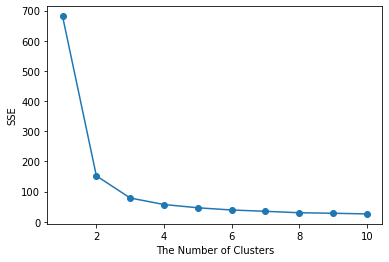

[681.3706, 152.34795176035792, 78.85144142614601, 57.25600931571815, 46.44618205128205, 39.066035353535355, 34.723277629233515, 29.99042640692641, 28.278674715635244, 26.094089542638308]


In [30]:
elbow(X)

In [51]:
#km.inertia_
#      Sum of squared distances of samples to their closest cluster center,
#      weighted by the sample weights if provided.
help(km)

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the 

In [53]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [67]:
(((X.iloc[km.predict(X)==0,:] - km.cluster_centers_[0])**2).sum().sum()+
 ((X.iloc[km.predict(X)==1,:] - km.cluster_centers_[1])**2).sum().sum()+
 ((X.iloc[km.predict(X)==2,:] - km.cluster_centers_[2])**2).sum().sum())

78.85144142614601

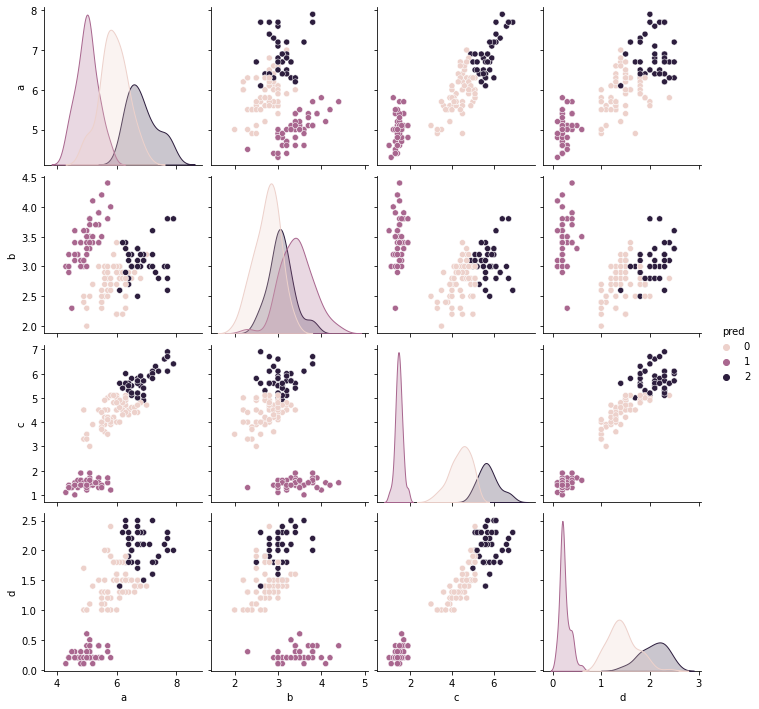

In [162]:
# k-means 시각화 
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt

km = KMeans(n_clusters = 3, random_state=1)
km.fit(X)

df_iris=pd.DataFrame()
df_iris=X
df_iris['pred'] = km.predict(X)

sns.pairplot(df_iris,
             diag_kind='kde',
             hue="pred")
plt.show()

In [164]:
df_iris['pred']

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: pred, Length: 150, dtype: int32

In [165]:
(df_iris['pred']==iris.target).sum()

36

### 계층적 군집 
- https://steadiness-193.tistory.com/285
- https://ahnjg.tistory.com/90
- RMSLE???
- ???

목차
1. 분류분석 평가 방법들
1. https://scikit-learn.org/stable/modules/model_evaluation.html  

1. 군집 (모델의 성능이라기 보다 비지도학습 모델의 정도?를 정하기 위함)
    1. 군집 분석 모델 : k-mean / DBSCAN
    1. metrics.calinski_harabasz_score(X, labels)  
    Compute the Calinski and Harabasz score.
    1. metrics.silhouette_score(X, labels, *[, ...])  
    Compute the mean Silhouette Coefficient of all samples.  
    1. 엘보우 기법으로
    
1. 분류
    1. 분류모델 : 로지스틱 분류 / 의사결정나무 / 앙상블 / 인공신경망 / KNN / SVM SVC...
    1. ROC_AUC_CURVE 
    1. confusion matirx
        1. 정밀도, 민감도, f1 score 등등
    1. classification_report

1. 회귀
    1. 회귀모델 : 선형 회귀 / 릿지라쏘 / 의사결정나무 회귀 / 앙상블 회귀 / 
    1. RMSE (MSE)
    1. R2 score
    1.

1. 스코어를 매기는 방법
    1. CV test-train-split
        1. K-fold
        1. stratified K-fold

1. 모델 결정을 위한 매개변수 결정의 방법
    1. 그리드서치CV
- cross_val_score
- cross_validate  
https://jhryu1208.github.io/data/2021/01/24/ML_cross_validation/#1-1)-scikit-learn%EC%97%90%EC%84%9C%EC%9D%98-%EA%B5%90%EC%B0%A8-%EA%B2%80%EC%A6%9D-(cross_val_score-&-cross_validate)  
https://continuous-development.tistory.com/166  
https://dev-lagom.tistory.com/43

OOB 점수를 쓰면 앙상블에서, CV를 안해도됨
train, test split 데이터를 안쓰고 바로 X, y를 쓰고 OOB SCORE를 쓰면 됨

# Appendix.

### 의사결정나무

### 앙상블

#### 배깅

#### 랜덤포레스트

#### 부스팅

### 나이브베이즈 분류

### KNN 분류기

### SVM 분류기

### 인공신경망 분류

## 회귀 분석